# KD树

kd树是一种对k维空间中的实例点进行存储以便对其进行快速检索的树形数据结构。主要应用于多维空间关键数据的搜索（如：范围搜索和最近邻搜索）。

## 从点云中构建KD树

In [4]:
import open3d as o3d
import numpy as np

In [13]:
pcd = o3d.io.read_point_cloud(r'G:\open3d\data\BunnyMesh.ply')
pcd.paint_uniform_color([0.5, 0.5, 0.5]) # 着色为灰色


# 使用KDTreeFlann构建kdtree
pcd_tree = o3d.geometry.KDTreeFlann(pcd)

In [14]:
# 将第3001个点着色为红色
pcd.colors[3000] = [1, 0, 0]

### search_knn_vector_3d

search_knn_vector_3d函数返回我们选择的点的k个最近邻的索引列表

In [6]:
print("寻找最近的300个点，并涂成蓝色")
[k, idx, _] = pcd_tree.search_knn_vector_3d(pcd.points[3000], 300) # 搜索离第3000个点最近的300个点，并返回索引列表idx
np.asarray(pcd.colors)[idx[1:], :] = [0, 0, 1] # 将除了自身以外的近邻点涂成蓝色

# 可视化结果
o3d.visualization.draw_geometries([pcd])

寻找最近的300个点，并涂成蓝色


可视化结果如下  
  
  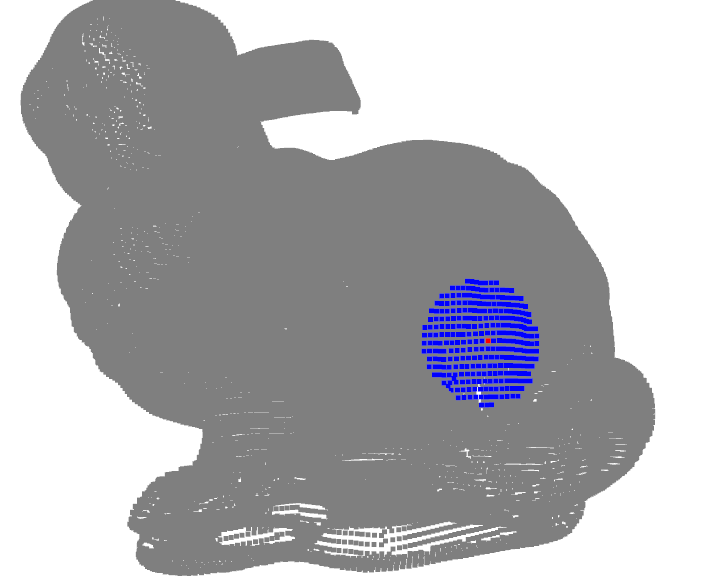

### search_radius_vector_3d

我们也可以使用search_radius_vector_3d来查询到选择点距离小于给定半径的所有点。我们用绿色绘制这些点。

In [15]:
print("将离选择点距离小于0.05的所有点涂成绿色")
[k, idx, _] = pcd_tree.search_radius_vector_3d(pcd.points[3000], 0.05)
np.asarray(pcd.colors)[idx[1:], :] = [0, 1, 0]

o3d.visualization.draw_geometries([pcd])

将离选择点距离小于0.05的所有点涂成绿色


可视化结果如图  
  
  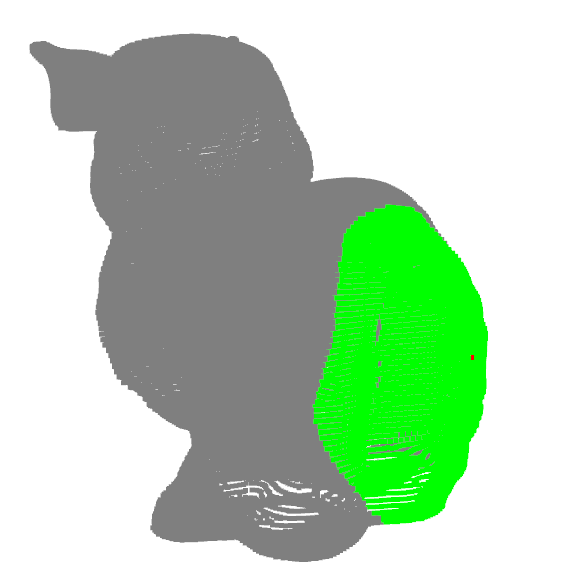

假如说我们想查询1m范围内最近的200个点的索引，也可以使用search_hybrid_vector_3d函数，该函数结合了上述两个函数的功能，使用方法也类似。